### Seaborn 시각화  II

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')           # 성가신 warning은 off 해준다. 

### 1. 산점도 행렬

In [2]:
# 내장 데이터를 불러옴.
dat = sns.load_dataset('iris')
dat.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dat.shape

(150, 5)

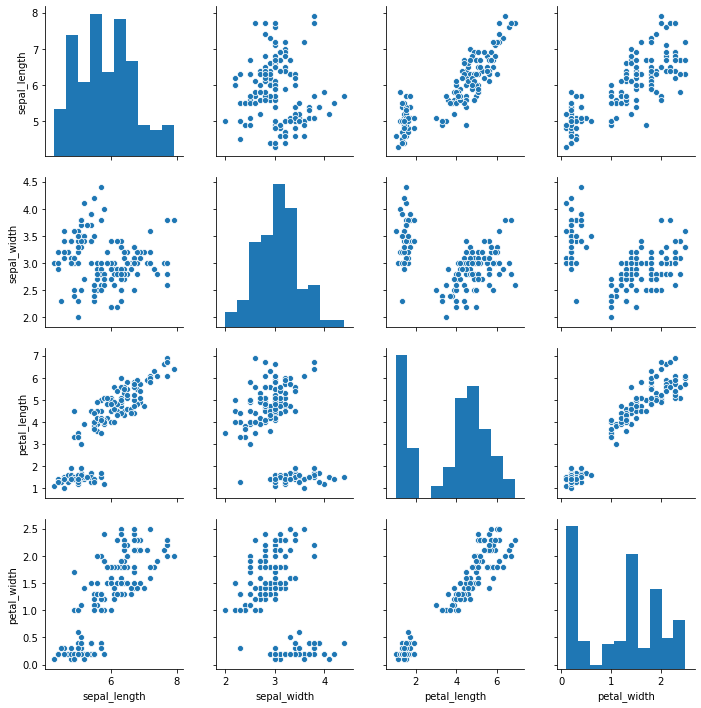

In [4]:
#산점도 행렬
sns.pairplot(dat)  #히스토그램과 산점도 함께 그려줌
plt.show()   

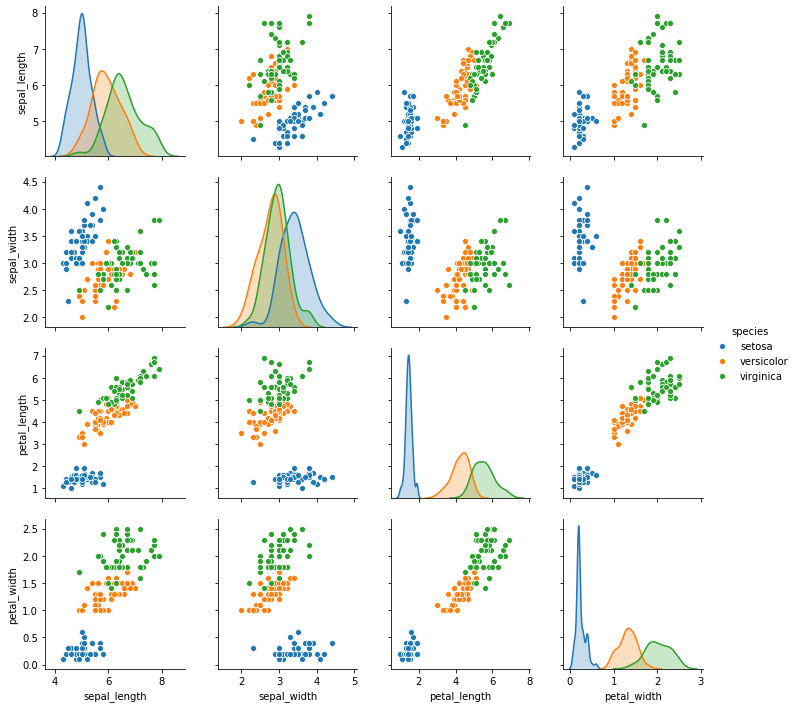

In [5]:
# species로 점의 색상 구분.
sns.pairplot(dat, hue='species')  #hue하면 더 자세하게 색칠됨
plt.show() 

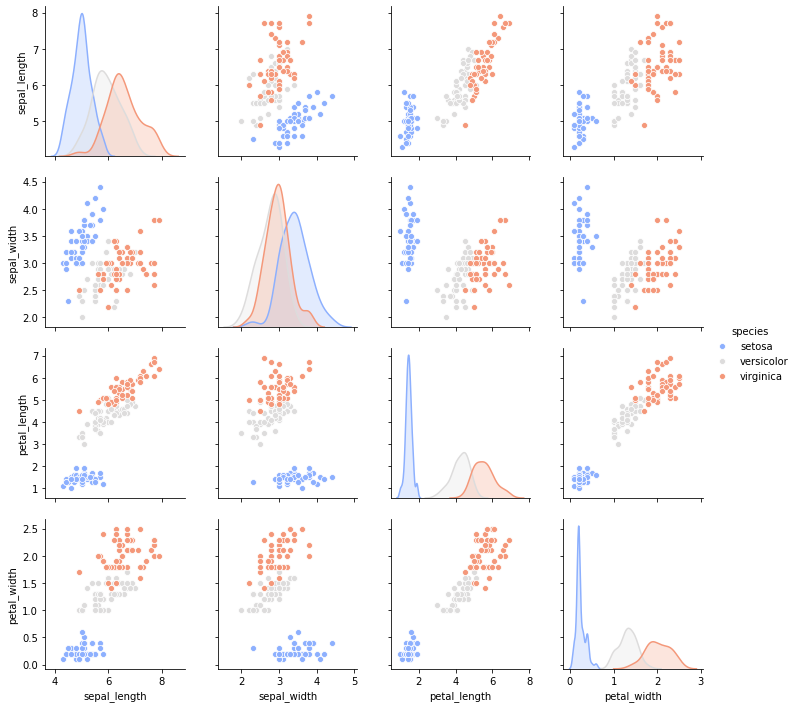

In [6]:
# species로 점의 색상 구분. palette 적용.
sns.pairplot(dat, hue='species', palette='coolwarm')
plt.show()

### 2. 혼합 유형의 시각화 행렬

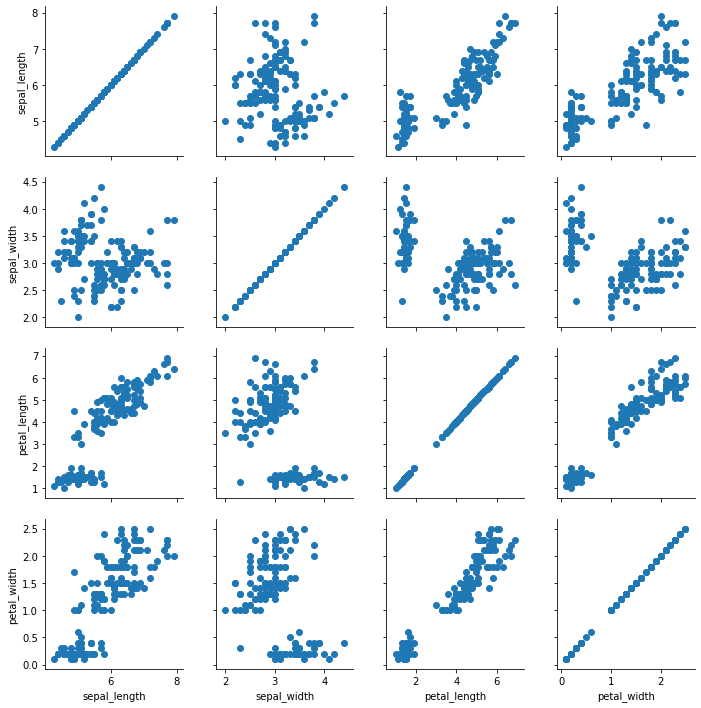

In [7]:
# 산점도 행렬.
g=sns.PairGrid(dat)
g.map(plt.scatter)
plt.show()

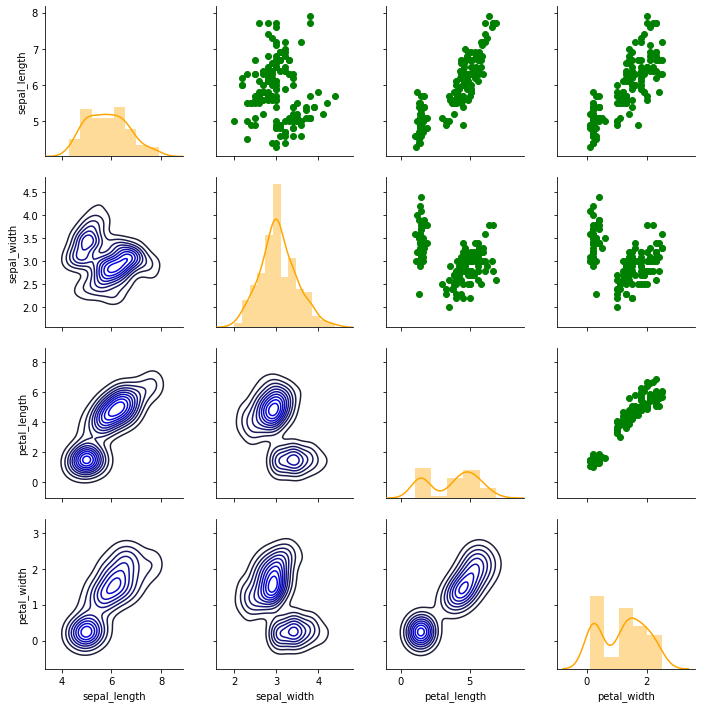

In [8]:
# 혼합 유형 시각화 행렬.
g=sns.PairGrid(dat)
g.map_diag(sns.distplot, color='orange')         # 대각선에는 히스토그램.
g.map_upper(plt.scatter, color='green')          # 위 삼각에는 산점도.
g.map_lower(sns.kdeplot, color='blue')           # 아래 삼각에는 KDE.
plt.show()

### 3. 다중 시각화 (Facet Grid)

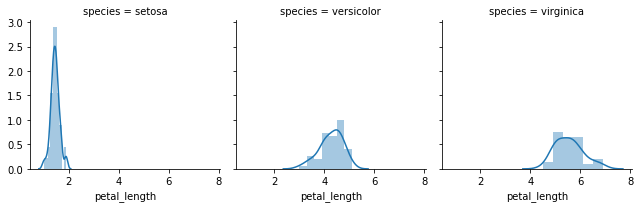

In [9]:
# 다중 히스토그램.
g=sns.FacetGrid(data=dat, col='species')  #species가지고 칼럼 쪼갬
g.map(sns.distplot, 'petal_length')       #displot넣어서 그려라
plt.show()

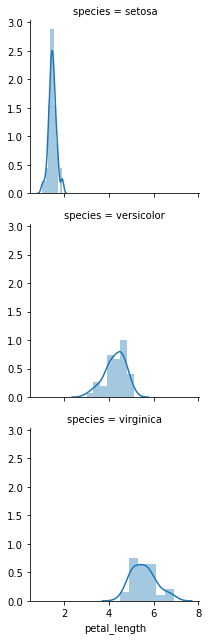

In [10]:
# 다중 히스토그램.
g=sns.FacetGrid(data=dat, row='species')
g.map(sns.distplot, 'petal_length')
plt.show()

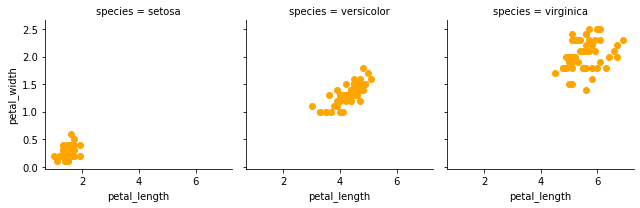

In [11]:
# 다중 산점도.
g=sns.FacetGrid(data=dat, col='species')
g.map(plt.scatter, 'petal_length', 'petal_width',color='orange')
plt.show()

### 4. heat map - 값의 크고작음을 색깔의 농도로 표시

In [12]:
# mpg 데이터를 불러온다. 
dat = sns.load_dataset('mpg')
x = dat.corr()
x

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


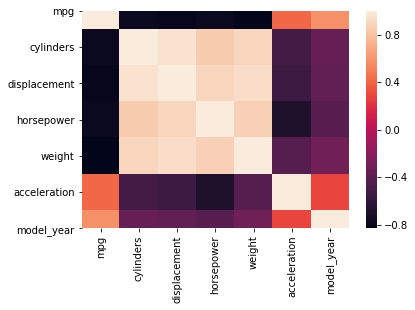

In [13]:
# Heatmap 디폴트.
sns.heatmap(x)    #x가 일종의 행렬일 때 그 값을 색깔로 표현
plt.show()

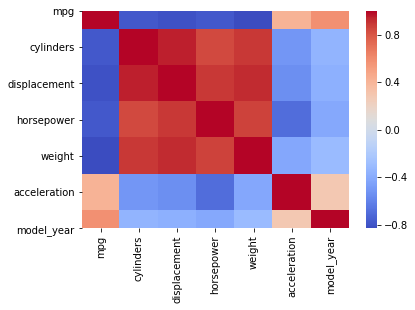

In [14]:
# Heatmap 디폴트.
# palette 대신에 cmap을 정해준다.
sns.heatmap(x, cmap = 'coolwarm')
plt.show()

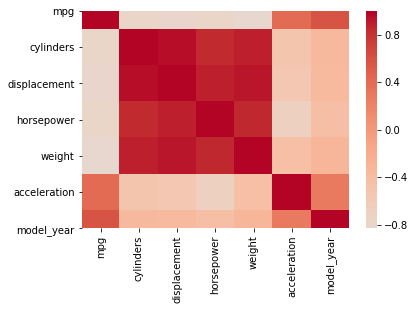

In [15]:
# Heatmap 디폴트.
# 중심 위치를 정해준다 (디폴트 = 0).
sns.heatmap(x, cmap = 'coolwarm', center=-1)
plt.show()